In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn xgboost lightgbm statsmodels pmdarima tensorflow keras scipy yfinance alpha_vantage

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached alpha_vantage-3.0.0-py3-none-any.whl.metadata (12 kB)
Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
Using cached alpha_vantage-3.0.0-py3-none-any.whl (35 kB)
Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# Import necessary libraries
import pandas as pd

data = pd.read_csv('/content/prices-split-adjusted.csv')
stock_data = pd.DataFrame(data)
# 1. View the structure of the dataset
print("Dataset Information:")
print(stock_data.info())

# 2. Preview the first few rows
print("\nFirst 5 Rows of the Dataset:")
print(stock_data.head())

# 3. Check for missing values
print("\nMissing Values in Each Column:")
print(stock_data.isnull().sum())

# 4. Get summary statistics
print("\nSummary Statistics:")
print(stock_data.describe())

# 5. Check the distribution of stock symbols
print("\nFrequency of Each Stock Symbol:")
print(stock_data['symbol'].value_counts())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
None

First 5 Rows of the Dataset:
         date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/prices-split-adjusted.csv"  # Update the file path if needed
data = pd.read_csv(file_path)
print("Columns and Data Types:\n")
df.dtypes

Columns and Data Types:



,0
date,object
symbol,object
open,float64
close,float64
low,float64
high,float64
volume,float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/prices-split-adjusted.csv"  # Update the file path if needed
data = pd.read_csv(file_path)
# Check for missing values
print("### Missing Values Before Cleaning ###")
print(df.isnull().sum())

# Remove rows with null values
df_cleaned = df.dropna()

# Verify if all null values are removed
print("\n### Missing Values After Cleaning ###")
print(df_cleaned.isnull().sum())

# Display the new shape of the dataset
print("\nOriginal Dataset Shape:", df.shape)
print("Cleaned Dataset Shape:", df_cleaned.shape)

### Missing Values Before Cleaning ###
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

### Missing Values After Cleaning ###
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

Original Dataset Shape: (851264, 7)
Cleaned Dataset Shape: (851264, 7)


In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile (25%)
        Q3 = df[column].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1                   # Interquartile Range

        # Define the acceptable range for values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out rows outside the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of numerical columns to check for outliers
numerical_columns = ['open', 'high', 'low', 'close', 'volume']

# Check dataset shape before removing outliers
print("Original Dataset Shape:", df.shape)

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_columns)

# Check dataset shape after removing outliers
print("Cleaned Dataset Shape:", df_cleaned.shape)


Original Dataset Shape: (851264, 7)
Cleaned Dataset Shape: (706002, 7)


Boxplot for open


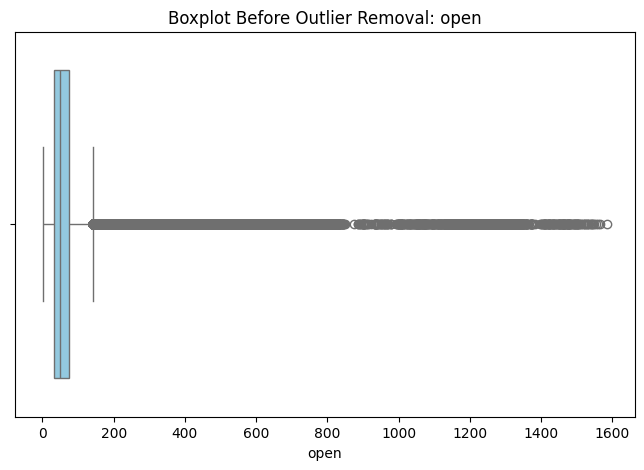

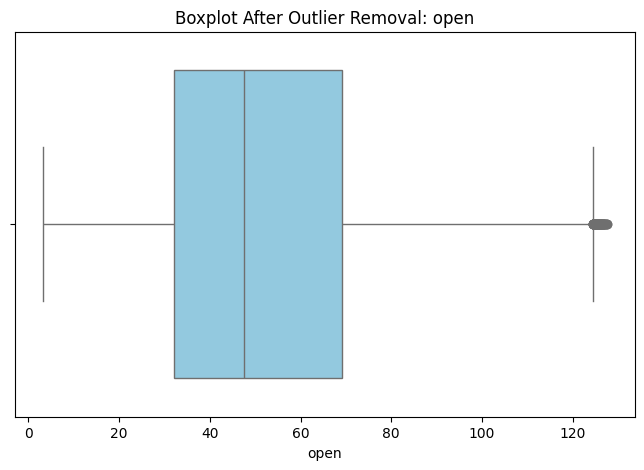

Boxplot for high


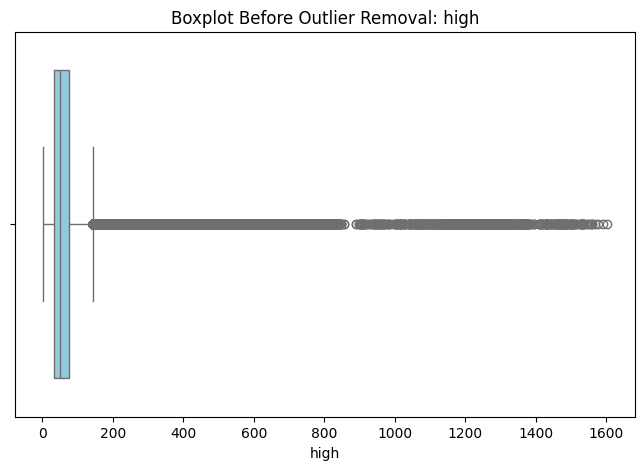

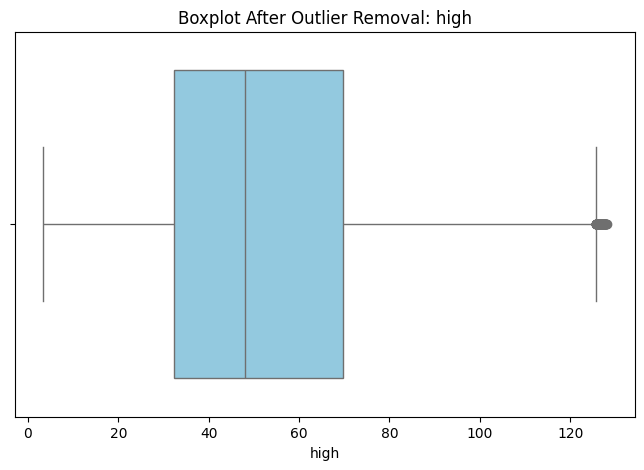

Boxplot for low


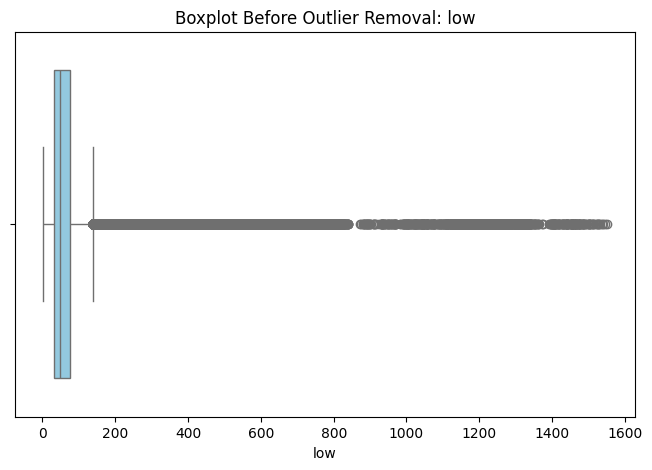

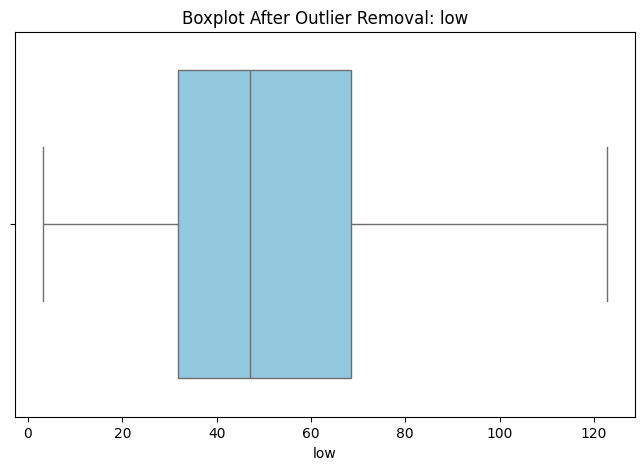

Boxplot for close


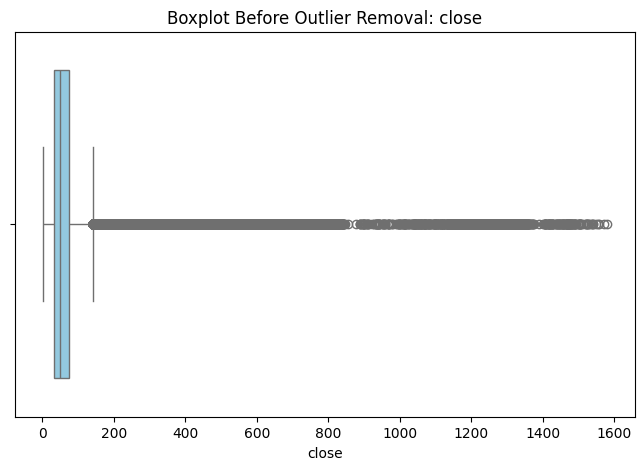

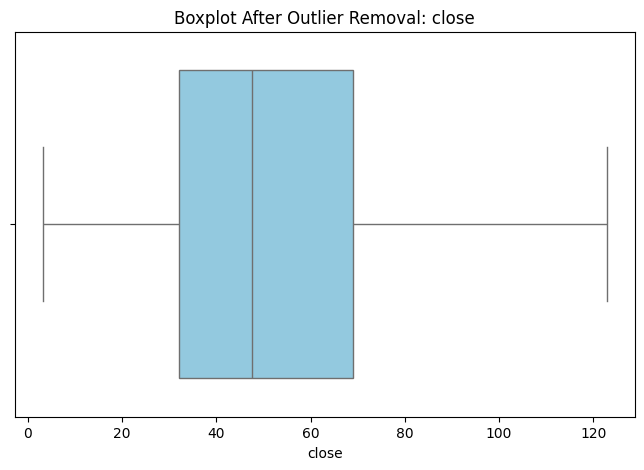

Boxplot for volume


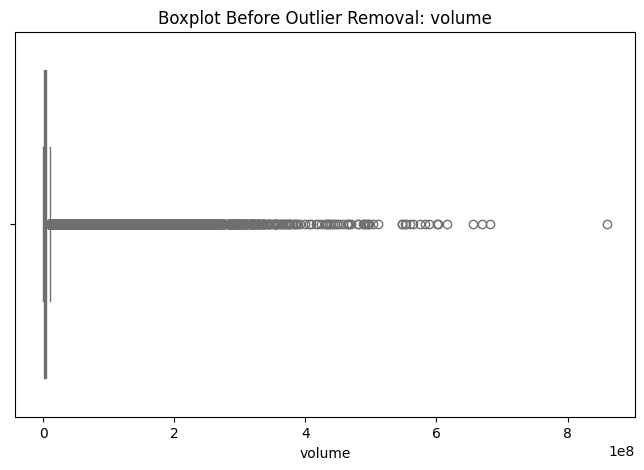

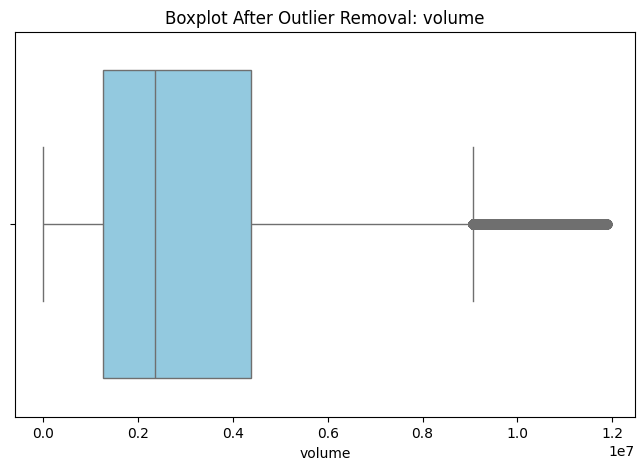

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot boxplots
def plot_boxplot(df, column, title):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=column, color="skyblue")
    plt.title(title)
    plt.xlabel(column)
    plt.show()

# Boxplots before and after outlier removal for a specific column
columns_to_plot = ['open', 'high', 'low', 'close', 'volume']

for column in columns_to_plot:
    print(f"Boxplot for {column}")
    # Before outlier removal
    plot_boxplot(df, column, f"Boxplot Before Outlier Removal: {column}")

    # After outlier removal
    plot_boxplot(df_cleaned, column, f"Boxplot After Outlier Removal: {column}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/prices-split-adjusted.csv"  # Update the file path if needed
data = pd.read_csv(file_path)
# 2. Summary Statistics
print("\n### Summary Statistics ###")
df.describe()



### Summary Statistics ###


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


### Data Overview ###
Shape of the dataset: (851264, 7)
Columns and Data Types:
 date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object
First 5 rows:
          date symbol        open       close         low        high  \
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  
Missing Values:
 date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

### Summary Statistics ###
                open          close            low           high  \
count  851264.000000  851264.0

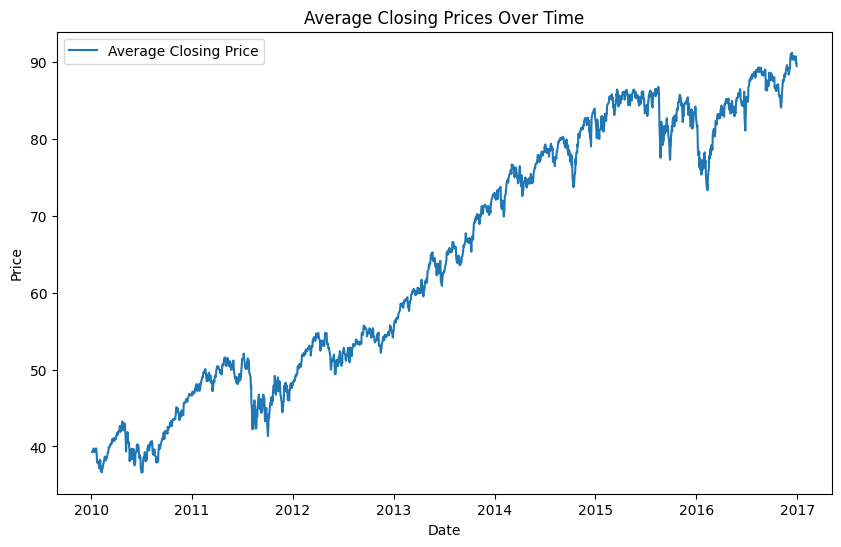

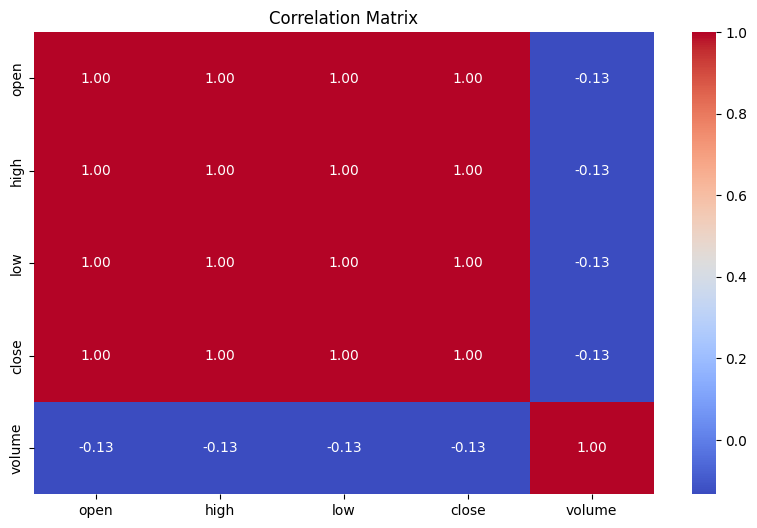

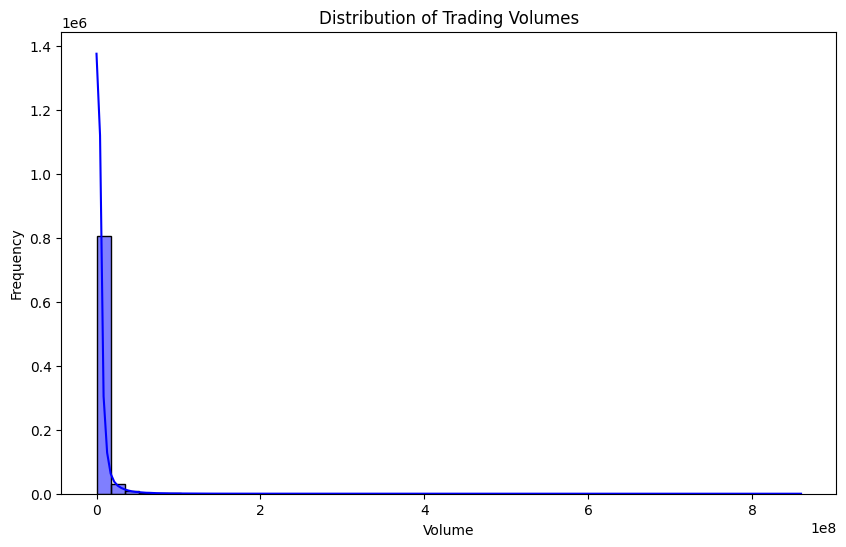

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/prices-split-adjusted.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# 1. Data Overview
print("### Data Overview ###")
print("Shape of the dataset:", df.shape)
print("Columns and Data Types:\n", df.dtypes)
print("First 5 rows:\n", df.head())
print("Missing Values:\n", df.isnull().sum())

# 2. Summary Statistics
print("\n### Summary Statistics ###")
print(df.describe())

# 3. Time-Series Analysis for Closing Prices
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
    closing_prices = df[['date', 'close']].groupby('date').mean()

    # Plotting closing prices over time
    plt.figure(figsize=(10, 6))
    plt.plot(closing_prices, label='Average Closing Price')
    plt.title("Average Closing Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# 4. Correlation Analysis
if {'open', 'high', 'low', 'close', 'volume'}.issubset(df.columns):
    plt.figure(figsize=(10, 6))
    correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

# 5. Distribution of Trading Volumes
if 'volume' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['volume'], kde=True, bins=50, color='blue')
    plt.title("Distribution of Trading Volumes")
    plt.xlabel("Volume")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
for i in stock_data.columns:
  print(i,"\t-\t", stock_data[i].isna().mean()*100)

date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


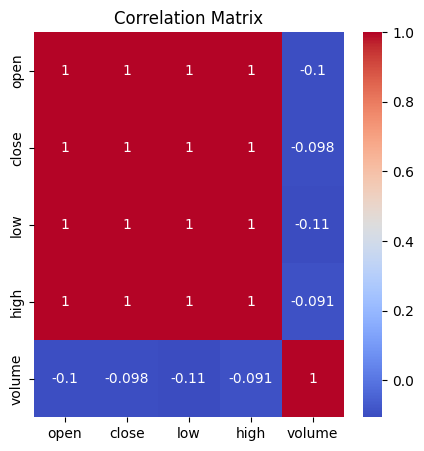

Highly Correlated Columns with 'close':
       corr value
open     0.999382
close    1.000000
low      0.999615
high     0.999737

Filtered Dataset Preview:
           open      close        low       high
253   40.700001  40.380001  40.360001  41.040001
720   40.299999  40.139999  39.720001  40.310001
1188  40.049999  40.490002  40.049999  40.779999
1656  39.549999  40.480000  39.549999  40.540001
2124  40.250000  40.639999  40.110001  40.820000

Filtered Dataset Shape: (1762, 4)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/prices-split-adjusted.csv')
df = pd.DataFrame(data)
# Filter the dataset for a specific company's stock (AAP in this case)
df = df[df['symbol'] == 'AAP']

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix
cormap = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cormap, annot=True, cmap="coolwarm", ax=ax)
plt.title("Correlation Matrix")
plt.show()

# Function to get highly correlated columns
def get_correlated_cols(cor_dat, threshold):
    """
    Extract columns with correlation values above a certain threshold.

    Parameters:
    - cor_dat: Correlation data for a specific column.
    - threshold: Minimum absolute correlation value to consider.

    Returns:
    - A DataFrame with correlated column names and their correlation values.
    """
    feature = []
    value = []

    for index in cor_dat.index:
        if abs(cor_dat[index]) > threshold:
            feature.append(index)
            value.append(cor_dat[index])

    result = pd.DataFrame(data=value, index=feature, columns=['corr value'])
    return result

# Get top correlated values for the 'close' column with a threshold of 0.60
top_correlated_values = get_correlated_cols(cormap['close'], 0.60)
print("Highly Correlated Columns with 'close':")
print(top_correlated_values)

# Select only highly correlated columns for predictions
df = df[top_correlated_values.index]

# Preview the filtered dataset
print("\nFiltered Dataset Preview:")
print(df.head())

# Display the shape of the filtered dataset
print("\nFiltered Dataset Shape:", df.shape)


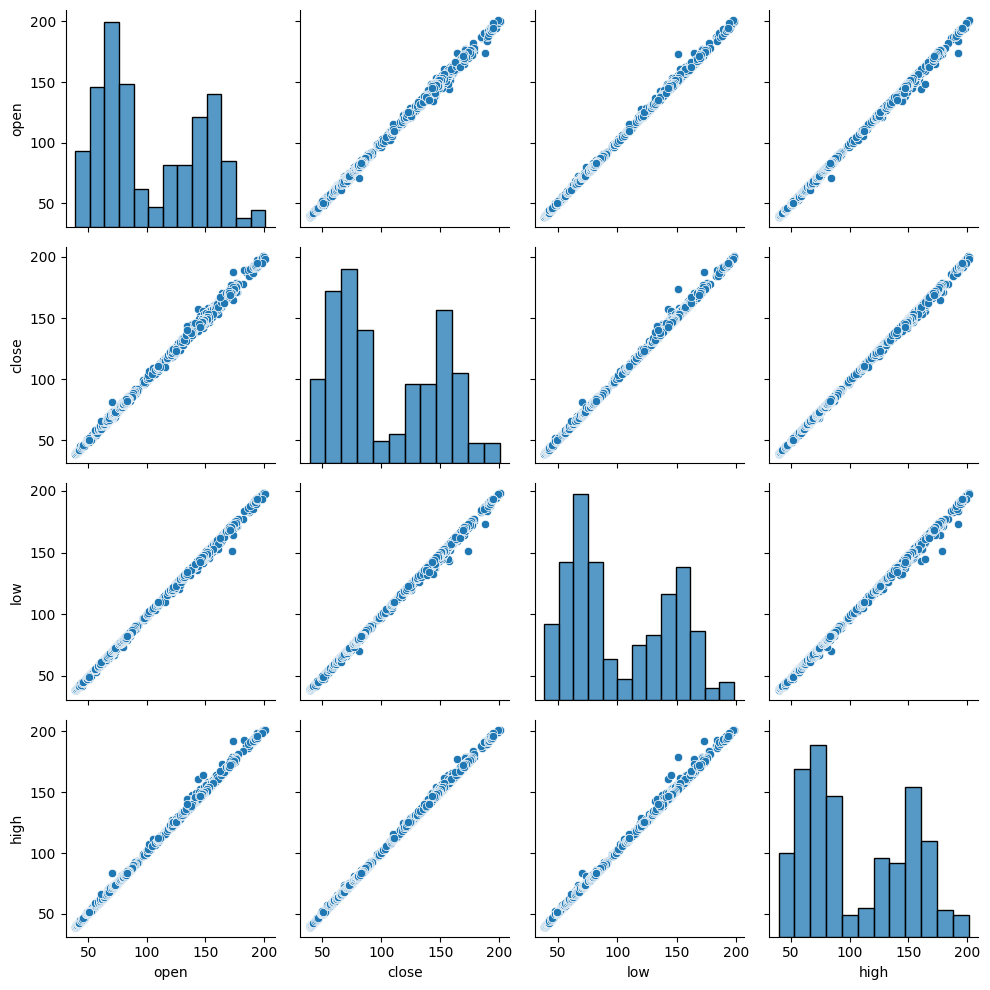

In [ ]:
sns.pairplot(df)
plt.tight_layout()

In [ ]:
X = df.drop(['close'], axis=1)
y = df['close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [ ]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [ ]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


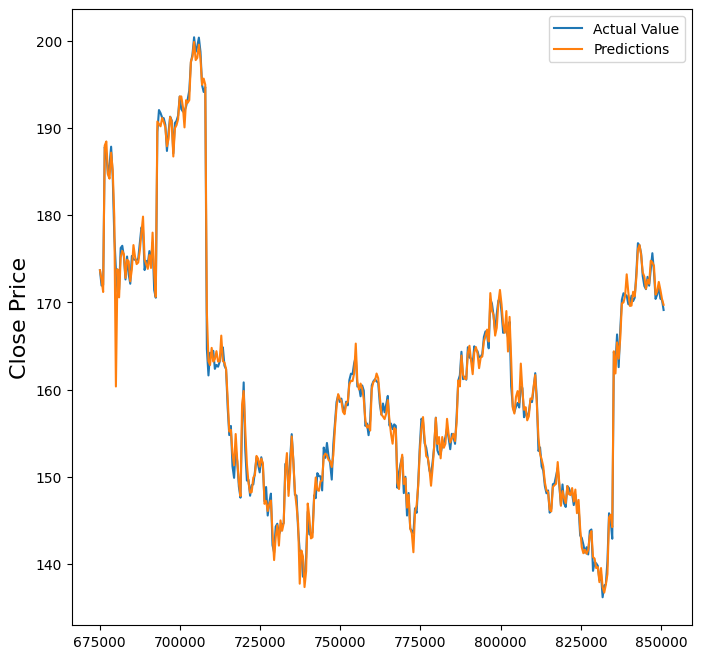

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):

    model = Sequential()

    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [ ]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6225.3726 - val_loss: 22079.5605
Epoch 2/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6104.5400 - val_loss: 21961.3398
Epoch 3/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5964.9756 - val_loss: 21412.9062
Epoch 4/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5712.3350 - val_loss: 19616.7734
Epoch 5/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5071.7700 - val_loss: 15508.5918
Epoch 6/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3598.7275 - val_loss: 9027.3145
Epoch 7/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1681.0433 - val_loss: 2825.3799
Epoch 8/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 292.6143 - val_loss: 450.4276
Epoch 9/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.0605 - val_loss: 192.2585
Epoch 10/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4957 - val_loss: 199.7344
Epoch 11/70
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.9089 - val_loss: 188.1290
Epoch 12/70
36

In [ ]:
y_pred_2 = model_2.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.145279
675608,171.919998,172.460892
676105,172.000000,170.671906
676602,187.789993,179.395889
677099,187.029999,188.202713


In [ ]:
from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9876849385621077


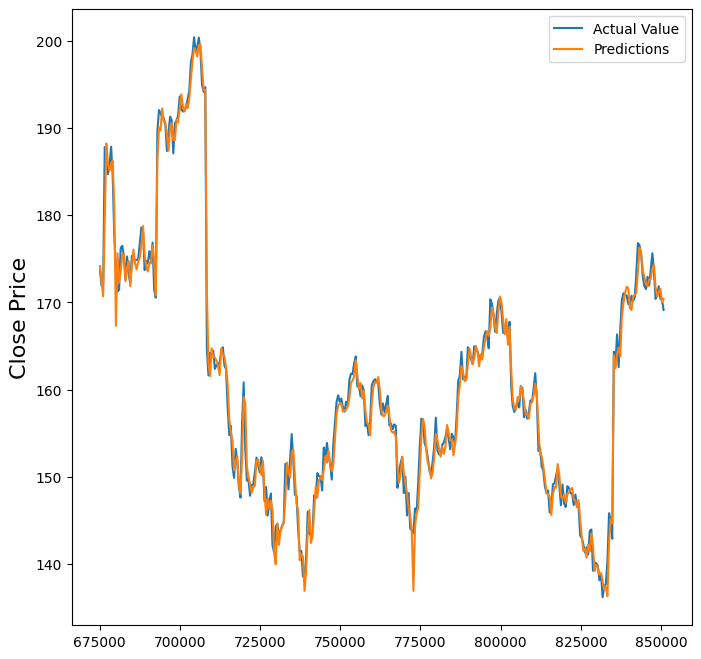

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
import numpy as np
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():

    model = Sequential()

    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model


In [ ]:
model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 5830.0615 - val_loss: 8961.2178
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 790.4673 - val_loss: 2.0312
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.4477 - val_loss: 32.1514
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3462 - val_loss: 9.9037
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2510 - val_loss: 3.8187
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5976 - val_loss: 1.6598
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4485 - val_loss: 1.4431
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4254 - val_loss: 1.4463
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4052 - val_loss: 1.5554
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4202 - val_loss: 1.4486
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4153 - val_loss: 1.5491
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [ ]:
# Prediction

y_pred_3 = model_3.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,172.844330
675608,171.919998,171.264999
676105,172.000000,169.535767
676602,187.789993,179.553055
677099,187.029999,187.004868


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.980863236089059


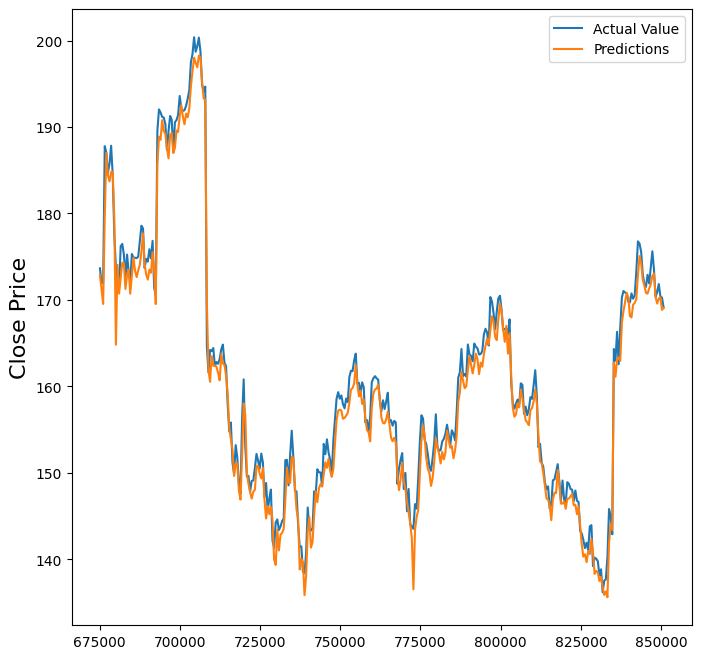

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

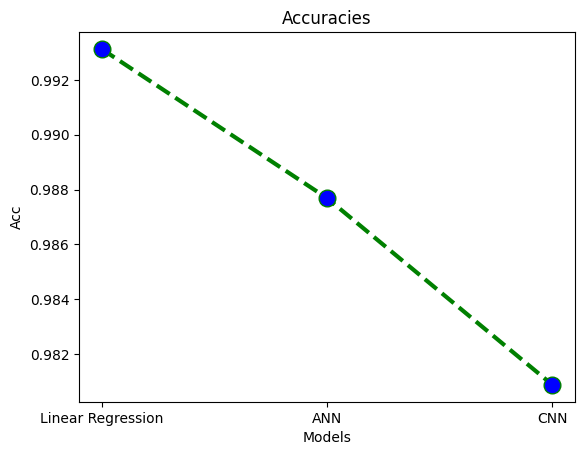

In [ ]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

In [ ]:
close = df.reset_index()['close']
close.head()

,close
0,40.380001
1,40.139999
2,40.490002
3,40.480000
4,40.639999


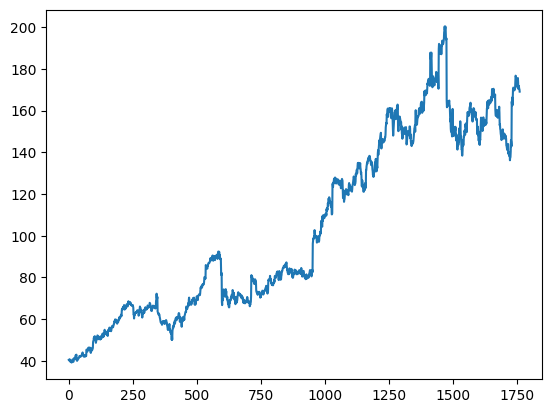

In [ ]:
plt.plot(close)
plt.show()

In [ ]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [ ]:
X[:5]

array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

In [ ]:
y[:5]

array([42.880001, 40.150002, 40.      , 40.240002, 40.220001])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


In [ ]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [ ]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()

    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [ ]:
# Model Training

model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4755.1055 - val_loss: 669.0859
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 160.3901 - val_loss: 116.7117
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 18.2477 - val_loss: 44.2543
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 17.1095 - val_loss: 36.0905
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 14.9100 - val_loss: 32.3975
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 14.2199 - val_loss: 33.0174
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 16.4902 - val_loss: 33.1899
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 17.1781 - val_loss: 31.1120
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.2268 - val_loss: 30.5471
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 15.3276 - val_loss: 30.7130
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 15.3350 - val_loss: 38.2099
Epoch 12/100
35/35 ━━━━━━

In [ ]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,184.868347
1,185.770004,185.270477
2,187.839996,185.327179
3,184.449997,186.729599
4,177.539993,186.578308


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9243967309207075


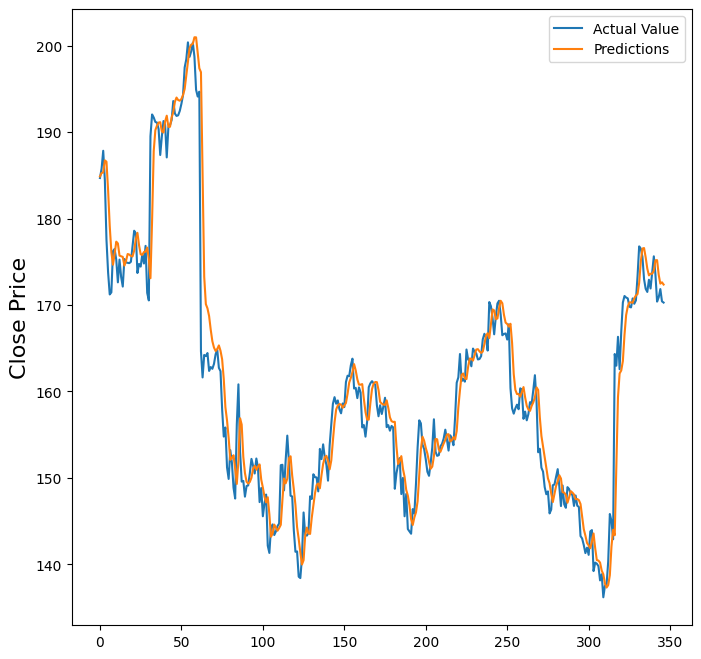

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6095.7524 - val_loss: 22405.0762
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6271.4116 - val_loss: 22007.0410
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5974.0820 - val_loss: 19288.3613
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5337.1099 - val_loss: 10293.1533
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2823.2661 - val_loss: 214.1482
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 444.0964 - val_loss: 1952.7209
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 237.2875 - val_loss: 1428.2295
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218.3541 - val_loss: 1441.2107
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201.3727 - val_loss: 1341.5162
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196.0737 - val_loss: 1242.6671
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191.6372 - val_loss: 1218.5199
Epoch 12/100

In [ ]:
# Prediction

y_pred_2 = model_2.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.8254407499313274


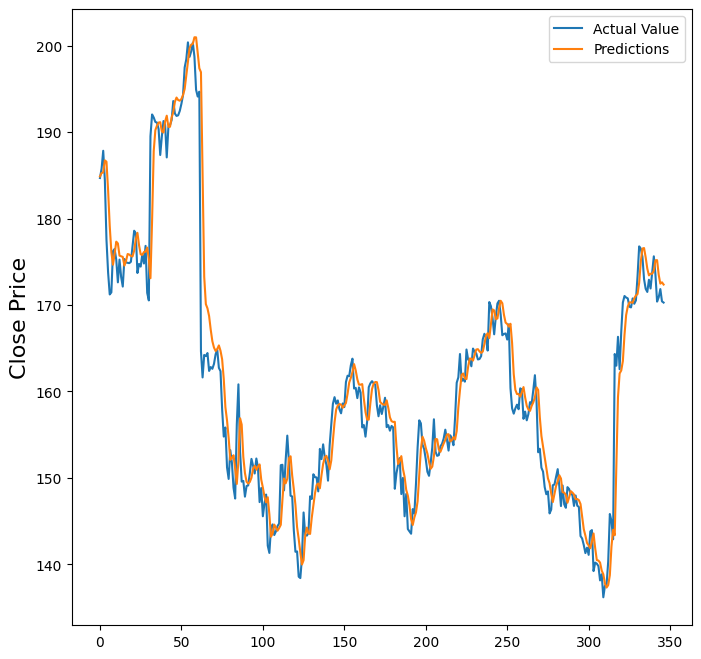

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 4736.5000 - val_loss: 573.1006
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 162.9267 - val_loss: 91.3224
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 16.8282 - val_loss: 58.7972
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.6362 - val_loss: 40.3826
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.2568 - val_loss: 41.9866
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 15.8872 - val_loss: 70.4870
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 15.2484 - val_loss: 35.1499
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 16.8221 - val_loss: 64.9901
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 14.7558 - val_loss: 49.9757
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 15.9940 - val_loss: 54.4330
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 15.0800 - val_loss: 48.9208
Epoch 12/100
35/35 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,185.273117
1,185.770004,185.202820
2,187.839996,186.137466
3,184.449997,187.483429
4,177.539993,185.727753


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score

print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9345185436250458


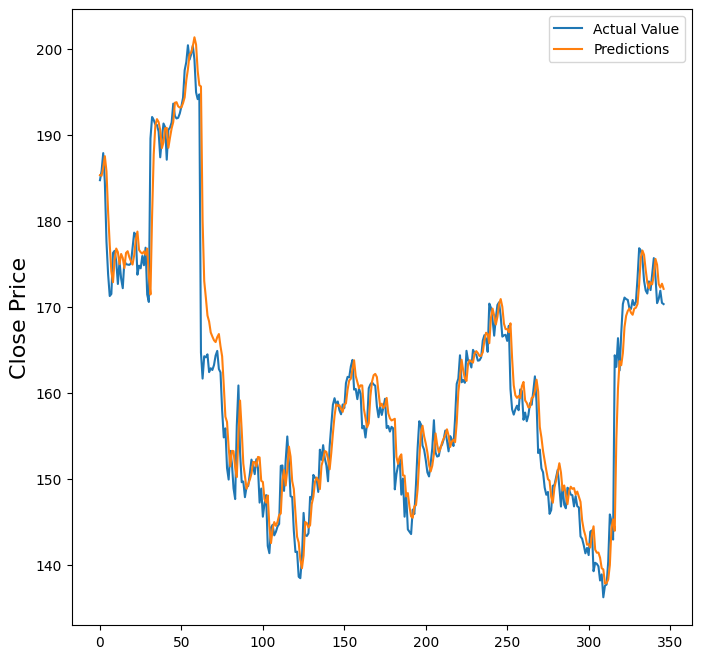

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

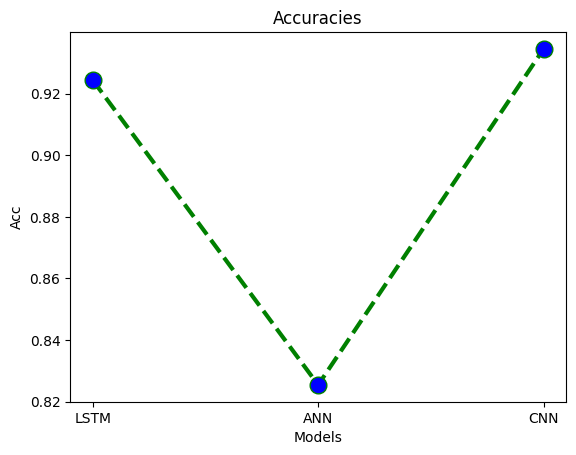

In [ ]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()